In [1]:
# Neural Net ROC
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc

# Load data set
data_values = pd.read_csv("../../../Datasets/train_values_processed.csv")
y = data_values.status_group
data_values.drop(['status_group'], axis=1, inplace=True)
X = data_values

from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
    
y = y.astype('category')
y = lb_make.fit_transform(y.fillna(method='ffill'))  

y = label_binarize(y, classes=[0, 1, 2])

In [2]:
classes = 3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
RFclf =OneVsRestClassifier(MLPClassifier(solver='adam',activation='relu',learning_rate='constant',learning_rate_init=0.01,alpha=0.0001,
                          hidden_layer_sizes=(100)))

y_score = RFclf.fit(X_train, y_train).predict(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:,i], y_score[:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

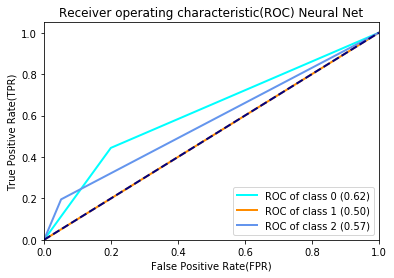

In [3]:
import matplotlib.pyplot as plt
from itertools import cycle
operationalColor = cycle(['red', 'orange', 'blue'])
for i, color in zip(range(classes), operationalColor):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC of class {0} ({1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate(FPR)')
plt.ylabel('True Positive Rate(TPR)')
plt.title('Receiver operating characteristic(ROC) Neural Net')
plt.legend(loc="lower right")
plt.show()